In [1]:
from urllib.parse import urlparse, urljoin, urlencode, quote, quote_plus

quote('파 이 썬'), quote_plus('파 이 썬') # space bar를 %20인지 +인지 사이트 마다 다름

('%ED%8C%8C%20%EC%9D%B4%20%EC%8D%AC', '%ED%8C%8C+%EC%9D%B4+%EC%8D%AC')

In [2]:
from urllib.parse import unquote, unquote_plus

unquote('%ED%8C%8C%20%EC%9D%B4%20%EC%8D%AC'), unquote('%ED%8C%8C+%EC%9D%B4+%EC%8D%AC')

('파 이 썬', '파+이+썬')

In [3]:
urlencode({'key' : '파이썬'})

'key=%ED%8C%8C%EC%9D%B4%EC%8D%AC'

#### 네이버

In [4]:
from urllib.request import urlopen, Request

In [5]:
url = 'https://search.naver.com/search.naver?query=' + quote('파이썬')
resp = urlopen(url)

In [7]:
resp.code, resp.reason

(200, 'OK')

In [8]:
resp.read().decode('utf8')

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="파이썬 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'파이썬\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'파이썬\'의 네이버 통합검색 결과입니다."> <title>파이썬 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_200716.css"> <link rel="stylesheet" type="text/css" href

#### 구글

In [9]:
url = 'https://www.google.co.kr/search'
params = {
    'q' : '',
    'ie' : 'UTF-8'
}
params['q'] = '파이썬'
params

{'q': '파이썬', 'ie': 'UTF-8'}

In [10]:
urlencode(params)

'q=%ED%8C%8C%EC%9D%B4%EC%8D%AC&ie=UTF-8'

In [11]:
url + '?' + urlencode(params)

'https://www.google.co.kr/search?q=%ED%8C%8C%EC%9D%B4%EC%8D%AC&ie=UTF-8'

In [12]:
# resp = urlopen(url + '?' + urlencode(params))
# 403 Error

In [13]:
req = Request(url + '?' + urlencode(params),
              headers={'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36'})

In [14]:
req.get_full_url()

'https://www.google.co.kr/search?q=%ED%8C%8C%EC%9D%B4%EC%8D%AC&ie=UTF-8'

In [15]:
req.headers

{'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36'}

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>파이썬 - Google 검색</title><script nonce="iskIuKibBn3RyjntRayjlg==">(function(){window.google={kEI:\'rE4UX8afMYiS0gSqsKqYBQ\',kEXPI:\'31\',kBL:\'dOFG\'};google.sn=\'web\';google.kHL=\'ko\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var c;a&&(!a.getAttribute||!(c=a.getAttribute("eid")));)a=a.parentNode;return c||google.kEI};google.getLEI=function(a){for(var c=null;a&&(!a.getAttribute||!(c=a.getAttribute("leid")));)a=a.parentNode;return c};google.ml=function(){return null};google.time=function(){return Date.now()};google.log=function(a,c,b,d,g){if(b=google.logUrl(a,c,b,d,g)){a=new Image;var e=google.lc,f=google.li;e[f]=a;a.onerror=a.onload=a.onabort=function(){delete e[f]};google.vel&&google.vel.lu&&google.vel.lu(b);a.src=b;google
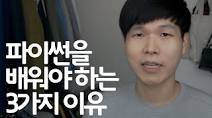
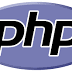
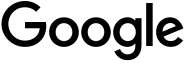

In [16]:
resp = urlopen(req)
resp.read().decode('utf8')

In [19]:
from urllib.error import HTTPError

try:
    resp = urlopen(url + '?' + urlencode(params))
except HTTPError as e:
    print(e.code)
    print()
    print(e.reason)
    print()
    print(e.headers)
    print()
    print(e.info)

403

Forbidden

Content-Type: text/html; charset=UTF-8
Date: Sun, 19 Jul 2020 13:46:58 GMT
Server: gws
Cache-Control: private
X-XSS-Protection: 0
X-Frame-Options: SAMEORIGIN
Alt-Svc: h3-29=":443"; ma=2592000,h3-27=":443"; ma=2592000,h3-25=":443"; ma=2592000,h3-T050=":443"; ma=2592000,h3-Q050=":443"; ma=2592000,h3-Q046=":443"; ma=2592000,h3-Q043=":443"; ma=2592000,quic=":443"; ma=2592000; v="46,43"
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close
Transfer-Encoding: chunked



<bound method addinfo.info of <HTTPError 403: 'Forbidden'>>


#### HTTP Status Codes

- 1xx : Information
- 2xx : Success
    - 200 : request succeeded
    - 204 : no content present
- 3xx : Redirection
- 4xx : Client error
    - 403 : forbidden page
    - 404 : page not found
- 5xx : Server error
    - 500 : internal server error
    - 503 : try again later

In [20]:
url = 'http://httpbin.org/get'
resp = urlopen(url)
print(resp.headers)
print(resp.read().decode('utf8'))

Date: Sun, 19 Jul 2020 13:47:29 GMT
Content-Type: application/json
Content-Length: 276
Connection: close
Server: gunicorn/19.9.0
Access-Control-Allow-Origin: *
Access-Control-Allow-Credentials: true


{
  "args": {}, 
  "headers": {
    "Accept-Encoding": "identity", 
    "Host": "httpbin.org", 
    "User-Agent": "Python-urllib/3.7", 
    "X-Amzn-Trace-Id": "Root=1-5f144ef1-88962a3893899c88b7085008"
  }, 
  "origin": "182.221.110.241", 
  "url": "http://httpbin.org/get"
}



In [21]:
url = 'http://httpbin.org/get?key=value'
resp = urlopen(url)
print(resp.headers)
print(resp.read().decode('utf8'))

Date: Sun, 19 Jul 2020 15:54:58 GMT
Content-Type: application/json
Content-Length: 308
Connection: close
Server: gunicorn/19.9.0
Access-Control-Allow-Origin: *
Access-Control-Allow-Credentials: true


{
  "args": {
    "key": "value"
  }, 
  "headers": {
    "Accept-Encoding": "identity", 
    "Host": "httpbin.org", 
    "User-Agent": "Python-urllib/3.7", 
    "X-Amzn-Trace-Id": "Root=1-5f146cd2-658d484293784ff97e469e75"
  }, 
  "origin": "182.221.110.241", 
  "url": "http://httpbin.org/get?key=value"
}



In [22]:
# url = 'http://httpbin.org/post' # post 방식이기 떄문에 405 error
# resp = urlopen(url)
# print(resp.headers)
# print(resp.read().decode('utf8'))

In [23]:
req = Request(url=url, data = 'key=value'.encode('utf-8'), method = 'POST')
req.data

b'key=value'

In [24]:
params = {
    'key' : 'value',
    'name' : '한글'
}

urlencode(params)

'key=value&name=%ED%95%9C%EA%B8%80'

In [25]:
url = 'http://httpbin.org/post'
# resp = urlopen(Request(url=url, data = b'key=value', method = 'POST'))
resp = urlopen(Request(url=url, data = urlencode(params).encode('utf8'), method = 'POST'))
print(resp.headers)
print(resp.read().decode('utf8'))

Date: Sun, 19 Jul 2020 15:55:22 GMT
Content-Type: application/json
Content-Length: 478
Connection: close
Server: gunicorn/19.9.0
Access-Control-Allow-Origin: *
Access-Control-Allow-Credentials: true


{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "key": "value", 
    "name": "\ud55c\uae00"
  }, 
  "headers": {
    "Accept-Encoding": "identity", 
    "Content-Length": "33", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "Python-urllib/3.7", 
    "X-Amzn-Trace-Id": "Root=1-5f146cea-534b6be8414b4afe57623d50"
  }, 
  "json": null, 
  "origin": "182.221.110.241", 
  "url": "http://httpbin.org/post"
}



In [26]:
url = 'http://httpbin.org/post?key=value1'
# resp = urlopen(Request(url=url, data = b'key=value', method = 'POST'))
resp = urlopen(Request(url=url, data = urlencode(params).encode('utf8'), method = 'POST'))

print(resp.headers)
print(resp.read().decode('utf8'))

Date: Sun, 19 Jul 2020 15:56:50 GMT
Content-Type: application/json
Content-Length: 512
Connection: close
Server: gunicorn/19.9.0
Access-Control-Allow-Origin: *
Access-Control-Allow-Credentials: true


{
  "args": {
    "key": "value1"
  }, 
  "data": "", 
  "files": {}, 
  "form": {
    "key": "value", 
    "name": "\ud55c\uae00"
  }, 
  "headers": {
    "Accept-Encoding": "identity", 
    "Content-Length": "33", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "Python-urllib/3.7", 
    "X-Amzn-Trace-Id": "Root=1-5f146d42-73699ad27fa50396f49dbb34"
  }, 
  "json": null, 
  "origin": "182.221.110.241", 
  "url": "http://httpbin.org/post?key=value1"
}



In [27]:
url

'http://httpbin.org/post?key=value1'

In [28]:
tokens = urlparse(url) # url을 6개의 component로 쪼개 준다.
tokens[1] + '/get'

'httpbin.org/get'

In [29]:
urljoin(url, '/get?asdfasdfa')

'http://httpbin.org/get?asdfasdfa'

### Request

In [30]:
import requests

resp = requests.get('http://httpbin.org/get?key=value')

resp = requests.get('http://httpbin.org/get?key=한글') # error 나지 않음

In [31]:
resp.headers

{'Date': 'Sun, 19 Jul 2020 15:57:29 GMT', 'Content-Type': 'application/json', 'Content-Length': '354', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}

In [32]:
resp.content # body 부분 / bite

b'{\n  "args": {\n    "key": "\\ud55c\\uae00"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.22.0", \n    "X-Amzn-Trace-Id": "Root=1-5f146d69-2ffe6e348f6562f0f01c6154"\n  }, \n  "origin": "182.221.110.241", \n  "url": "http://httpbin.org/get?key=\\ud55c\\uae00"\n}\n'

In [33]:
resp.text

'{\n  "args": {\n    "key": "\\ud55c\\uae00"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.22.0", \n    "X-Amzn-Trace-Id": "Root=1-5f146d69-2ffe6e348f6562f0f01c6154"\n  }, \n  "origin": "182.221.110.241", \n  "url": "http://httpbin.org/get?key=\\ud55c\\uae00"\n}\n'

In [34]:
resp.encoding = 'euc-kr' # encoding 변경 가능 / 국내 사이트에서 유용하게 사용

resp.text

'{\n  "args": {\n    "key": "\\ud55c\\uae00"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.22.0", \n    "X-Amzn-Trace-Id": "Root=1-5f146d69-2ffe6e348f6562f0f01c6154"\n  }, \n  "origin": "182.221.110.241", \n  "url": "http://httpbin.org/get?key=\\ud55c\\uae00"\n}\n'

In [35]:
resp.request.headers

{'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

200


'<!doctype html><html lang="ko"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>&#54028;&#51060;&#50028; - Google &#44160;&#49353;</title><script nonce="uD8aDMOcUSgFMEEGC2EEJQ==">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){\nvar a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.g
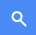
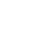
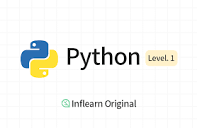
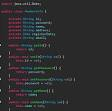
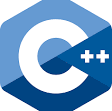
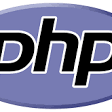
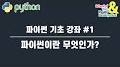

In [36]:
resp = requests.get('http://www.google.com/search?q=파이썬')
print(resp.status_code)
resp.text

200


'<!doctype html><html lang="ko"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>파이썬 - Google 검색</title><script nonce="oltfO3ynqCxuk/zCegZ31w==">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){\nvar a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};var h=funct
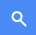
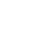
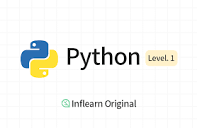
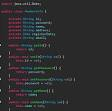
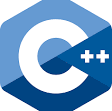
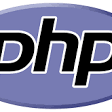
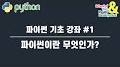

In [37]:
resp = requests.get('http://www.google.com/search?q=파이썬&oe=utf-8')
print(resp.status_code)
resp.text

In [38]:
resp = requests.post('http://httpbin.org/post', data = {'key': 'value'})
resp.text

'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {\n    "key": "value"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Content-Length": "9", \n    "Content-Type": "application/x-www-form-urlencoded", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.22.0", \n    "X-Amzn-Trace-Id": "Root=1-5f146d86-71c00bcefcc18e8187275973"\n  }, \n  "json": null, \n  "origin": "182.221.110.241", \n  "url": "http://httpbin.org/post"\n}\n'

In [39]:
resp = requests.post('http://httpbin.org/post?ie=utf9',
                     data = {'key': 'value'})
resp.text

'{\n  "args": {\n    "ie": "utf9"\n  }, \n  "data": "", \n  "files": {}, \n  "form": {\n    "key": "value"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Content-Length": "9", \n    "Content-Type": "application/x-www-form-urlencoded", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.22.0", \n    "X-Amzn-Trace-Id": "Root=1-5f146d89-a1055aefd40634252bacb132"\n  }, \n  "json": null, \n  "origin": "182.221.110.241", \n  "url": "http://httpbin.org/post?ie=utf9"\n}\n'

In [40]:
resp = requests.get('http://httpbin.org/status/200')
print(resp.text)
print(resp.status_code)
print(resp.reason)
print(resp.headers)
print(resp.request.headers)


200
OK
{'Date': 'Sun, 19 Jul 2020 15:58:03 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '0', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}
{'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


In [41]:
resp = requests.get('http://httpbin.org/status/403')
print(resp.text)
print(resp.status_code)
print(resp.reason)
print(resp.headers)
print(resp.request.headers)


403
FORBIDDEN
{'Date': 'Sun, 19 Jul 2020 15:58:05 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '0', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}
{'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


In [42]:
resp = requests.get('http://httpbin.org/status/403')
# resp.raise_for_status() # error
if (resp.status_code != 200):
    print(resp.reason)

FORBIDDEN


In [43]:
resp = requests.get('http://httpbin.org/image/jpeg')
print(resp.headers)
resp.content

{'Date': 'Sun, 19 Jul 2020 15:58:10 GMT', 'Content-Type': 'image/jpeg', 'Content-Length': '35588', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}


b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x02\x00\x1c\x00\x1c\x00\x00\xff\xfe\x005Edited by Paul Sherman for WPClipart, Public Domain\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x00\xb2\x00\xef\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1e\x00\x00\x01\x05\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x06\x03\x04\x05\x07\x08\x02\t\x00\x01\n\xff\xc4\x00M\x10\x00\x01\x03\x03\x01\x07\x02\x03\x05\x05\x06\x02\x07\x06\x07\x00\x04\x01\x03\x05\x02\x06\x11!\x00\x07\x08\x12\x13\x141#A"$Q\t\x1534a\x162Dq\x81BCST\x91\xa1\x17\x18%cdr\xb1\xe1\xf05Rbs\xc1\xd1&Ut\x83\x84\xa2\xf1\xff\xc4\x00\x1b\x01\

In [44]:
resp.headers.get('Content-Type').split('/')[0]

'image'

In [45]:
resp.headers.get('Content-Type').split('/')[1]

'jpeg'

In [46]:
file = 'test.' + resp.headers.get('Content-Type').split('/')[1]

In [48]:
with open(file, 'wb') as f: # image 저장
    f.write(resp.content)

In [49]:
from urllib.robotparser import RobotFileParser

robot = RobotFileParser()

In [50]:
robot.set_url('http://httpbin.org/robots.txt') # setting
robot.read()
print(robot.can_fetch('*', '/get'))
print(robot.can_fetch('*', '/deny'))

True
False


In [51]:
from requests.compat import urlparse, urljoin
from requests.exceptions import HTTPError
import time

def canfetch(url, agent='*', path='/'):
    '''
        robot.txt 확인 후 Crawling 가능하면 True 안되면 False
    '''
    robot = RobotFileParser(urljoin(url, '/robots.txt'))
    robot.read()
    return robot.can_fetch(agent, urlparse(url)[2])

def download(url, params={}, headers={}, method='GET', limit = 3):
#     print(url)
#     print(canfetch(url))
    if canfetch(url) == False:
        print('[Error] : ' + url)
#     else:
    try:
        resp = requests.request(method, url,
                              params=params if method == 'GET' else {},
                              data=params if method == 'POST' else {},
                              headers=headers)
        resp.raise_for_status()
    except HTTPError as e:
        if limit > 0 and e.response.status_code >=500:
            print(limit)
            time.sleep(1)
            resp = download(url, params, headers, method, limit-1)
        else:
            print('[{}] '.format(resp.status_code) + url)
            print(e.response.status_code)
            print(e.response.reason)
            print(e.response.headers)
    return resp

In [52]:
download('http://httpbin.org/status/500')

3
2
1
[500] http://httpbin.org/status/500
500
INTERNAL SERVER ERROR
{'Date': 'Sun, 19 Jul 2020 15:59:03 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '0', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}


<Response [500]>

In [53]:
download('http://httpbin.org/get')

<Response [200]>

In [54]:
download('http://httpbin.org/post', {'k' : 'v'}, method = 'POST')

<Response [200]>

In [55]:
download('http://httpbin.org/deny', {'k' : 'v'}, method = 'POST')

[Error] : http://httpbin.org/deny
[405] http://httpbin.org/deny
405
METHOD NOT ALLOWED
{'Date': 'Sun, 19 Jul 2020 16:00:40 GMT', 'Content-Type': 'text/html', 'Content-Length': '178', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Allow': 'OPTIONS, HEAD, GET', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}


<Response [405]>

In [56]:
download('http://httpbin.org/post', {'k' : 'v'})

[405] http://httpbin.org/post
405
METHOD NOT ALLOWED
{'Date': 'Sun, 19 Jul 2020 16:00:42 GMT', 'Content-Type': 'text/html', 'Content-Length': '178', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Allow': 'POST, OPTIONS', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}


<Response [405]>

[Error] : https://www.google.co.kr/search


'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>파 이 썬 - Google 검색</title><script nonce="BR/Ettk67hzsH/Mpe5mf0g==">(function(){window.google={kEI:\'Mm4UX5jpFreGr7wP2K6qwAE\',kEXPI:\'31\',kBL:\'dOFG\'};google.sn=\'web\';google.kHL=\'ko\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var c;a&&(!a.getAttribute||!(c=a.getAttribute("eid")));)a=a.parentNode;return c||google.kEI};google.getLEI=function(a){for(var c=null;a&&(!a.getAttribute||!(c=a.getAttribute("leid")));)a=a.parentNode;return c};google.ml=function(){return null};google.time=function(){return Date.now()};google.log=function(a,c,b,d,g){if(b=google.logUrl(a,c,b,d,g)){a=new Image;var e=google.lc,f=google.li;e[f]=a;a.onerror=a.onload=a.onabort=function(){delete e[f]};google.vel&&google.vel.lu&&google.vel.lu(b);a.src=b;goo
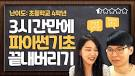
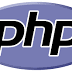
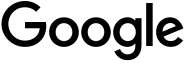

In [57]:
# google
url = 'https://www.google.co.kr/search'
params = {
    'q' : '',
    'oq' : '',
    'ie' : 'UTF-8'
}
params['q'] = params['oq'] = '파 이 썬'
headers = {
    'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36'
}

resp = download(url, params, headers, 'GET')
resp.text

In [58]:
resp.request.headers

{'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [59]:
# naver
url = 'https://search.naver.com/search.naver'
params = {
    'sm' : 'top_hty',
    'fbm' : 0,
    'ie' : 'urt8',
    'query' : ''
}
params['qeury'] = '파이썬'
resp = download(url, params, headers, 'GET')
resp.text

[Error] : https://search.naver.com/search.naver


'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content=" : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'\'의 네이버 통합검색 결과입니다."> <title> : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_200716.css"> <link rel="stylesheet" type="text/css" href="https://ss

In [60]:
# daum
url = 'https://search.daum.net/search'
params = {
    'w' : 'tot',
    'DA' : 'YZR',
    't__nil_searchbox' : 'btn',
    'sug':'',
    'sugo': '',
    'sq' : '',
    'o' : '',
    'q' : ''    
}
params['qeury'] = '파이썬'
resp = download(url, params, headers, 'GET')
resp.text

[Error] : https://search.daum.net/search


'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!doctype html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" class="win chrome ">\n<head profile="http://a9.com/-/spec/opensearch/1.1/">\n<meta http-equiv="content-Type" content="text/html;charset=utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta name="autocomplete" content="off" />\n\n<meta name="referrer" content="always">\n\n<meta name="format-detection" content="telephone=no" />\n<meta property="og:title" content=" &ndash; Daum 검색" />\n<meta property="og:url" content="https://search.daum.net/search?w=tot&q=" />\n<meta property="og:description" content="Daum 검색에서 에 대한 최신정보를 찾아보세요." />\n<meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" />\n<meta property="og:site_name" content="다음검색" />\n<title> &ndash; Daum 검색</title>\n<link rel="search" type="application/opensearchdescription+xml" href="//search.daum.net/OpenSearch.xml" title="Daum">\n<link rel

In [63]:
resp.request.headers, resp.request.url

({'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Content-Length': '185', 'Content-Type': 'application/x-www-form-urlencoded'},
 'http://www.moel.go.kr/searchapi/search_json.jsp')

In [64]:
# 서울시노동청
url = 'http://www.moel.go.kr/searchapi/search_json.jsp'
params = {
    'query': '',
    'prefixQuery': 'LOCAL1|LOCAL2|LOCAL3|LOCAL4|LOCAL5|LOCAL6',
    'requery': '',
    'sort': 'RANK',
    'sortOrder': 'DESC',
    'startCount': '',
    'listCount': 10,
    'sitecd': 'seoul'
}
params['qeury'] = '최저임금'
resp = download(url, params, headers, 'POST')
resp.text

'\r\n\r\n\r\n\r\n{"SearchQueryResult":{"Version":"5.3.0","SuggestedQuery":"","Collection":[{"Id":"moel","MorphemeAnalysis":{"Field":{"TITLE":"","CONTENTS":"","ATTACH_NM":"","ATTACH_CON":"","INPUT_NAME":""}},"DocumentSet":{"Count":"10","TotalCount":"5885","Document":[{"Uid":"80122","Rank":"0","Date":"2020/07/17 19:12:47","Weight":"0","SearcherId":"sc","CollectionId":"moel","DuplicateDocumentCount":"0","Field":{"DOCID":"LOCAL1_20200700654","BBS_ID":"LOCAL1","BBS_SEQ":"20200700654","BBS_NM":"공지사항","BBS_DESC":"","TITLE":"\'20년 디지털일자리/일경험지원 사업: 각 센터별 배정인원 및 운영기관 수","CONTENTS":"고용노동부 공고 제2020-288호  공모사업의 서울본청 및 소속지청별 배정인원 및 위탁기관 수를 공지하오니,  해당 사업을 운영하고자 하는 기관은 참고하여 신청하여 주시기 바랍니다.  * 신청 전 반드시 사업별 상세공고 내용 확인  서울센터 02-2004-7010  서초센터 02-580-4915  강남센터 02-3468-4781 (디지털), 02-3468-4829 (일경험)  동부센터 02-2142-8917  서부센터 02-2077-6097  남부센터 02-2639-2418  북부센터 02-2171-1865  관악센터 02-328...","ATTACH_SEQ":"20200701146||20200701147","ATTACH_NM":"2020년 청년디지털일자리사업 및 청년일경험지원사업 민간위탁사업자 합동공모 공고문.hwp||★[2020 디지털일자

In [65]:
result = resp.json()

In [66]:
for _ in result['SearchQueryResult']['Collection']:
    for __ in _['DocumentSet']['Document']:
        print(__['Field']['TITLE'])

'20년 디지털일자리/일경험지원 사업: 각 센터별 배정인원 및 운영기관 수
[2020-82] 고용센터 기간제 직업상담원 서류전형 합격 및 면접시험 일정 공고
'20년 6월 기준 서울지역 고용동향 & 인포그래픽
(코로나19) 일상생활 활동별 위험도 평가 등
(코로나19) 올바른 소독방법
올바른 마스크 착용법(코로나 19)
[2020-81] 기간제 직업상담원 모집 채용인원 수정 공고
인테리어 공사 사망사고 예방 기술자료(OPL) 안내
자율안전컨설팅 제도 변경 안내
[2020-80] 고용센터 기간제 직업상담원 모집 공고(수정)


#### Open API

In [67]:
url = 'http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty'
params = {
    'ServiceKey' : 'RW2PQ0e%2Bsf%2B%2Fsfd3CtYgjXMRogWR63vie2lm26HcSn2Za9N2j28lKaj%2FTylLym6CZY6oAgHRJf58oTNVKAI6kg%3D%3D',
    'numOfRows' : '10',
    'pageNo' : 1,
    'stationName' : '종로구', 
    'dataTerm' : 'DAILY',
    'ver' : '1.3',
    '_returnType' : 'json'
}
params['ServiceKey'] = unquote(params['ServiceKey'])
resp = download(url, params, headers, 'GET')
resp.text

'{"list":[{"_returnType":"json","coGrade":"1","coValue":"0.3","dataTerm":"","dataTime":"2020-07-19 24:00","khaiGrade":"1","khaiValue":"50","mangName":"도시대기","no2Grade":"1","no2Value":"0.014","numOfRows":"10","o3Grade":"1","o3Value":"0.017","pageNo":"1","pm10Grade":"1","pm10Grade1h":"1","pm10Value":"18","pm10Value24":"21","pm25Grade":"1","pm25Grade1h":"1","pm25Value":"13","pm25Value24":"15","resultCode":"","resultMsg":"","rnum":0,"serviceKey":"","sidoName":"","so2Grade":"1","so2Value":"0.002","stationCode":"","stationName":"","totalCount":"","ver":""},{"_returnType":"json","coGrade":"1","coValue":"0.3","dataTerm":"","dataTime":"2020-07-19 23:00","khaiGrade":"1","khaiValue":"50","mangName":"도시대기","no2Grade":"1","no2Value":"0.013","numOfRows":"10","o3Grade":"1","o3Value":"0.019","pageNo":"1","pm10Grade":"1","pm10Grade1h":"1","pm10Value":"20","pm10Value24":"21","pm25Grade":"1","pm25Grade1h":"1","pm25Value":"14","pm25Value24":"15","resultCode":"","resultMsg":"","rnum":0,"serviceKey":"","sid

In [68]:
url = 'http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty'
params = {
    'ServiceKey' : 'RW2PQ0e%2Bsf%2B%2Fsfd3CtYgjXMRogWR63vie2lm26HcSn2Za9N2j28lKaj%2FTylLym6CZY6oAgHRJf58oTNVKAI6kg%3D%3D',
    'numOfRows' : '10',
    'pageNo' : 1,
    'sidoName' : '서울', 
    'ver' : '1.3',
    '_returnType' : 'json'
}
params['ServiceKey'] = unquote(params['ServiceKey'])
resp = download(url, params, headers, 'GET')
resp.text

'{"list":[{"_returnType":"json","coGrade":"1","coValue":"0.3","dataTerm":"","dataTime":"2020-07-19 24:00","khaiGrade":"1","khaiValue":"50","mangName":"도시대기","no2Grade":"1","no2Value":"0.010","numOfRows":"10","o3Grade":"1","o3Value":"0.019","pageNo":"1","pm10Grade":"1","pm10Grade1h":"1","pm10Value":"18","pm10Value24":"19","pm25Grade":"1","pm25Grade1h":"1","pm25Value":"14","pm25Value24":"15","resultCode":"","resultMsg":"","rnum":0,"serviceKey":"","sidoName":"","so2Grade":"1","so2Value":"0.002","stationCode":"","stationName":"중구","totalCount":"","ver":""},{"_returnType":"json","coGrade":"1","coValue":"0.3","dataTerm":"","dataTime":"2020-07-19 24:00","khaiGrade":"2","khaiValue":"54","mangName":"도로변대기","no2Grade":"1","no2Value":"0.010","numOfRows":"10","o3Grade":"1","o3Value":"0.014","pageNo":"1","pm10Grade":"2","pm10Grade1h":"2","pm10Value":"35","pm10Value24":"34","pm25Grade":"2","pm25Grade1h":"2","pm25Value":"18","pm25Value24":"18","resultCode":"","resultMsg":"","rnum":0,"serviceKey":"","